# <font color="purple">City-wise Apartment's Data Analysis

# <font color="Red">EDA

    .EDA stands for Exploratory Data Analysis.
    .EDA is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.


# <font color="Red">Web-Scraping

    Web scraping is an automatic method to obtain large amounts of data from websites. Most of this data is unstructured data in an HTML format which is then converted into structured data in a spreadsheet or a database so that it can be used in various applications.

### <font color="green">Problem Statements:
    1. In which city we can buy an apartment in average price
    2. Which owner have more apartments
    3. Which Construction Status is More
    4. Which type of Bhk is more
    5. Which type of Bhk are more price

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## <font color="red"/>Web-Scraping</font>

In [2]:
url="https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city"
response=requests.get(url)
response

<Response [200]>

In [3]:
soup=BeautifulSoup(response.text,"html")
# print(soup.prettify())               # It Show the html code of the website.

#### 

## <font color="red"/>Data Collection</font>

In [4]:
city=["Bhubaneswar","Cuttack","Bangalore","Delhi","Mumbai","nagpur","bhopal","indore","pune","visakhapatnam","chennai","coimbatore","chandigarh","noida","allahabad","surat","gurgaon","varanasi","dehradun","faridabad","nashik","mysore","patna","lucknow","agra"]

In [5]:
city

['Bhubaneswar',
 'Cuttack',
 'Bangalore',
 'Delhi',
 'Mumbai',
 'nagpur',
 'bhopal',
 'indore',
 'pune',
 'visakhapatnam',
 'chennai',
 'coimbatore',
 'chandigarh',
 'noida',
 'allahabad',
 'surat',
 'gurgaon',
 'varanasi',
 'dehradun',
 'faridabad',
 'nashik',
 'mysore',
 'patna',
 'lucknow',
 'agra']

In [6]:
owner=[]
no_bhk=[]
citt=[]
loca=[]
pri=[]
psrf=[]
tsff=[]
cst=[]
# poss=[]



for i in city:
    url="https://www.makaan.com/"+i+"-residential-property/buy-property-in-"+i+"-city"
    response=requests.get(url)
    soup=BeautifulSoup(response.text,"html")
    
    #Owner Info
    own=soup.find_all("span",attrs={"class":"seller-type"}) # Seller 
    
    for o in own:
        owner.append(o.text)
    
    #No of BHK    
    bhk=soup.find_all("a",attrs={"class":"typelink"}) #BHk
    
    for b in bhk:
        no_bhk.append(b.span.text)
        
        
    #Locality Info
    loc=soup.find_all("span",attrs={"itemprop":"addressLocality"}) #Locality

    for l in loc:
        loca.append(l.text)
        
        
    #City Info
    cit=soup.find_all("span",attrs={"class":"cityName"}) #Locality

    for l in cit:
        citt.append(l.text)

        

        
    #Price
    pr=soup.find_all("div",attrs={"data-type":"price-link"}) #price
    
    for p in pr:
        pri.append(p.text)
        
        
    #price/squarefeet Info
    ps=soup.find_all("td",attrs={"class":"lbl rate"}) # price/squarefeet
    psf=[]
    for pf in ps:
        psf.append(pf.text)
    
    for q in psf:
        q1=q.replace(" / sq ft","")
        psrf.append(q1)
    
    #Total Squarefeet Info
    ts=soup.find_all("td",attrs={"class":"size"}) # Total Squarefeet
    tsf=[]
    for t in ts:
        tsf.append(t.text)
    
    for t1 in tsf:
        f=float(t1)
        tsff.append(f)
        
    #Construction Status Info
    cs=soup.find_all("td",attrs={"class":"val"}) # Construction Status
    
    for c in cs:
        cst.append(c.text)
        

In [7]:
df1=pd.DataFrame({"Owner":owner,
              "No_Bhk":no_bhk,
                  "City":citt,
              "locality":loca,
              "Price(in Lakh)":pri,
              "price/squarefeet":psrf,
              "Total Squarefeet":tsff,
              "Construction Status":cst
              
             
             
             })

In [8]:
df1  # This the Raw Dataset

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status
0,VERIFIED OWNER,4,Bhubaneswar,Balianta,66 L,"2,933",2250.0,Ready to move
1,VERIFIED OWNER,3,Bhubaneswar,Rasulgarh,93.96 L,"5,400",1740.0,Under Construction
2,VERIFIED OWNER,2,Bhubaneswar,Bhagawanpur,47 L,"4,700",1000.0,Under Construction
3,VERIFIED OWNER,3,Bhubaneswar,Sundarpada,85 L,"5,000",1700.0,Ready to move
4,VERIFIED OWNER,3,Bhubaneswar,Sundarpada,80 L,"4,369",1831.0,Ready to move
...,...,...,...,...,...,...,...,...
495,VERIFIED OWNER,3,Agra,Shastripuram,82 L,"9,213",890.0,Ready to move
496,VERIFIED OWNER,Residential Plot,Agra,Shastripuram,4.41 L,"1,037",425.0,Resale
497,BUILDER,Residential Plot,Agra,Rohta,6.5 L,722,900.0,New
498,BUILDER,Residential Plot,Agra,Agra Cantt,7.5 L,833,900.0,New


In [9]:
print(len(owner))

500


In [10]:
print(len(no_bhk))

500


In [11]:
print(len(loca))

500


In [12]:
print(len(pri))

500


In [13]:
print(len(psrf))

500


In [14]:
print(len(tsff))

500


In [15]:
print(len(cst))

500


In [16]:
df1.dtypes

Owner                   object
No_Bhk                  object
City                    object
locality                object
Price(in Lakh)          object
price/squarefeet        object
Total Squarefeet       float64
Construction Status     object
dtype: object

In [17]:
df1["No_Bhk"].value_counts()

3                   149
Residential Plot    131
2                   128
4                    47
1                    29
5                     8
6                     4
10                    2
7                     1
9                     1
Name: No_Bhk, dtype: int64

In [18]:
df1["No_Bhk"].replace("[a-z]",np.nan,regex=True,inplace=True)

In [19]:
df1

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status
0,VERIFIED OWNER,4,Bhubaneswar,Balianta,66 L,"2,933",2250.0,Ready to move
1,VERIFIED OWNER,3,Bhubaneswar,Rasulgarh,93.96 L,"5,400",1740.0,Under Construction
2,VERIFIED OWNER,2,Bhubaneswar,Bhagawanpur,47 L,"4,700",1000.0,Under Construction
3,VERIFIED OWNER,3,Bhubaneswar,Sundarpada,85 L,"5,000",1700.0,Ready to move
4,VERIFIED OWNER,3,Bhubaneswar,Sundarpada,80 L,"4,369",1831.0,Ready to move
...,...,...,...,...,...,...,...,...
495,VERIFIED OWNER,3,Agra,Shastripuram,82 L,"9,213",890.0,Ready to move
496,VERIFIED OWNER,NaN,Agra,Shastripuram,4.41 L,"1,037",425.0,Resale
497,BUILDER,NaN,Agra,Rohta,6.5 L,722,900.0,New
498,BUILDER,NaN,Agra,Agra Cantt,7.5 L,833,900.0,New


In [20]:
df1["No_Bhk"].isna().sum()

131

In [21]:
df1["No_Bhk"].value_counts()

3      149
2      128
4       47
1       29
5        8
6        4
10       2
7        1
9        1
Name: No_Bhk, dtype: int64

In [22]:
df1.columns

Index(['Owner', 'No_Bhk', 'City', 'locality', 'Price(in Lakh)',
       'price/squarefeet', 'Total Squarefeet', 'Construction Status'],
      dtype='object')

In [23]:
df1["price/squarefeet"]

0      2,933
1      5,400
2      4,700
3      5,000
4      4,369
       ...  
495    9,213
496    1,037
497      722
498      833
499      833
Name: price/squarefeet, Length: 500, dtype: object

In [24]:
df1["price/squarefeet"].replace("[,]","",regex=True).astype("int")

0      2933
1      5400
2      4700
3      5000
4      4369
       ... 
495    9213
496    1037
497     722
498     833
499     833
Name: price/squarefeet, Length: 500, dtype: int32

In [25]:
df1["price/squarefeet"]=df1["price/squarefeet"].replace("[,]","",regex=True).astype("int")

In [26]:
df1

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status
0,VERIFIED OWNER,4,Bhubaneswar,Balianta,66 L,2933,2250.0,Ready to move
1,VERIFIED OWNER,3,Bhubaneswar,Rasulgarh,93.96 L,5400,1740.0,Under Construction
2,VERIFIED OWNER,2,Bhubaneswar,Bhagawanpur,47 L,4700,1000.0,Under Construction
3,VERIFIED OWNER,3,Bhubaneswar,Sundarpada,85 L,5000,1700.0,Ready to move
4,VERIFIED OWNER,3,Bhubaneswar,Sundarpada,80 L,4369,1831.0,Ready to move
...,...,...,...,...,...,...,...,...
495,VERIFIED OWNER,3,Agra,Shastripuram,82 L,9213,890.0,Ready to move
496,VERIFIED OWNER,NaN,Agra,Shastripuram,4.41 L,1037,425.0,Resale
497,BUILDER,NaN,Agra,Rohta,6.5 L,722,900.0,New
498,BUILDER,NaN,Agra,Agra Cantt,7.5 L,833,900.0,New


In [27]:
df1["No_Bhk"].fillna(method="ffill",inplace=True)

In [28]:
df1["No_Bhk"].isna().sum()

0

In [29]:
df1["No_Bhk"].astype("int")

0      4
1      3
2      2
3      3
4      3
      ..
495    3
496    3
497    3
498    3
499    3
Name: No_Bhk, Length: 500, dtype: int32

In [30]:
df1["No_Bhk"]=df1["No_Bhk"].astype("int")

In [31]:
df1

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status
0,VERIFIED OWNER,4,Bhubaneswar,Balianta,66 L,2933,2250.0,Ready to move
1,VERIFIED OWNER,3,Bhubaneswar,Rasulgarh,93.96 L,5400,1740.0,Under Construction
2,VERIFIED OWNER,2,Bhubaneswar,Bhagawanpur,47 L,4700,1000.0,Under Construction
3,VERIFIED OWNER,3,Bhubaneswar,Sundarpada,85 L,5000,1700.0,Ready to move
4,VERIFIED OWNER,3,Bhubaneswar,Sundarpada,80 L,4369,1831.0,Ready to move
...,...,...,...,...,...,...,...,...
495,VERIFIED OWNER,3,Agra,Shastripuram,82 L,9213,890.0,Ready to move
496,VERIFIED OWNER,3,Agra,Shastripuram,4.41 L,1037,425.0,Resale
497,BUILDER,3,Agra,Rohta,6.5 L,722,900.0,New
498,BUILDER,3,Agra,Agra Cantt,7.5 L,833,900.0,New


In [32]:
df1["Price(in Lakh)"]

0          66 L
1       93.96 L
2          47 L
3          85 L
4          80 L
         ...   
495        82 L
496      4.41 L
497       6.5 L
498       7.5 L
499       7.5 L
Name: Price(in Lakh), Length: 500, dtype: object

In [33]:
e=[]
for i in df1["Price(in Lakh)"]:
    if i.endswith("r"):
        x=i.replace("Cr"," ")
        b=float(x)*100
        e.append(b)
    else:
        c=i.replace("L","")
        e.append(float(c))

In [34]:
df1["Price(in Lakh)"]=pd.Series(e)

In [35]:
df1

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status
0,VERIFIED OWNER,4,Bhubaneswar,Balianta,66.00,2933,2250.0,Ready to move
1,VERIFIED OWNER,3,Bhubaneswar,Rasulgarh,93.96,5400,1740.0,Under Construction
2,VERIFIED OWNER,2,Bhubaneswar,Bhagawanpur,47.00,4700,1000.0,Under Construction
3,VERIFIED OWNER,3,Bhubaneswar,Sundarpada,85.00,5000,1700.0,Ready to move
4,VERIFIED OWNER,3,Bhubaneswar,Sundarpada,80.00,4369,1831.0,Ready to move
...,...,...,...,...,...,...,...,...
495,VERIFIED OWNER,3,Agra,Shastripuram,82.00,9213,890.0,Ready to move
496,VERIFIED OWNER,3,Agra,Shastripuram,4.41,1037,425.0,Resale
497,BUILDER,3,Agra,Rohta,6.50,722,900.0,New
498,BUILDER,3,Agra,Agra Cantt,7.50,833,900.0,New


In [36]:
df1["Price(in Lakh)"]=np.round(df1["Price(in Lakh)"])

In [37]:
df1

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status
0,VERIFIED OWNER,4,Bhubaneswar,Balianta,66.0,2933,2250.0,Ready to move
1,VERIFIED OWNER,3,Bhubaneswar,Rasulgarh,94.0,5400,1740.0,Under Construction
2,VERIFIED OWNER,2,Bhubaneswar,Bhagawanpur,47.0,4700,1000.0,Under Construction
3,VERIFIED OWNER,3,Bhubaneswar,Sundarpada,85.0,5000,1700.0,Ready to move
4,VERIFIED OWNER,3,Bhubaneswar,Sundarpada,80.0,4369,1831.0,Ready to move
...,...,...,...,...,...,...,...,...
495,VERIFIED OWNER,3,Agra,Shastripuram,82.0,9213,890.0,Ready to move
496,VERIFIED OWNER,3,Agra,Shastripuram,4.0,1037,425.0,Resale
497,BUILDER,3,Agra,Rohta,6.0,722,900.0,New
498,BUILDER,3,Agra,Agra Cantt,8.0,833,900.0,New


In [38]:
df1.dtypes

Owner                   object
No_Bhk                   int32
City                    object
locality                object
Price(in Lakh)         float64
price/squarefeet         int32
Total Squarefeet       float64
Construction Status     object
dtype: object

## <font color="red"/>Data Cleaning</font>

### <font color="Blue"/>NaN Value</font>

In [39]:
df1.isna().sum()

Owner                  0
No_Bhk                 0
City                   0
locality               0
Price(in Lakh)         0
price/squarefeet       0
Total Squarefeet       0
Construction Status    0
dtype: int64

### <font color="blue"/>Outlier Detection</font>

In [40]:
sn=df1[["No_Bhk","Price(in Lakh)","price/squarefeet","Total Squarefeet"]] # Store all the numerical columns in an another variables.

In [41]:
sn

,No_Bhk,Price(in Lakh),price/squarefeet,Total Squarefeet
0,4,66.0,2933,2250.0
1,3,94.0,5400,1740.0
2,2,47.0,4700,1000.0
3,3,85.0,5000,1700.0
4,3,80.0,4369,1831.0
...,...,...,...,...
495,3,82.0,9213,890.0
496,3,4.0,1037,425.0
497,3,6.0,722,900.0
498,3,8.0,833,900.0


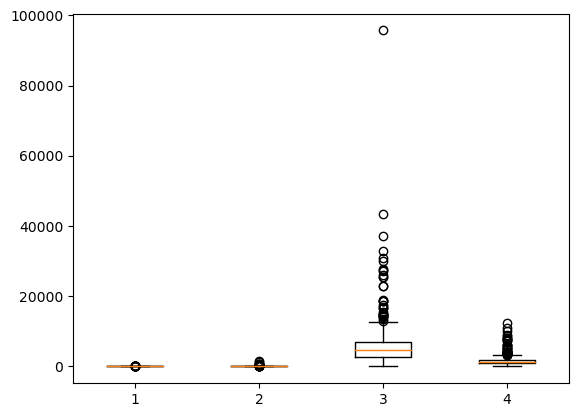

In [42]:
plt.boxplot(sn)
plt.show()

In [43]:
sn.columns

Index(['No_Bhk', 'Price(in Lakh)', 'price/squarefeet', 'Total Squarefeet'], dtype='object')

###  <font color="brown"/>No_Bhk

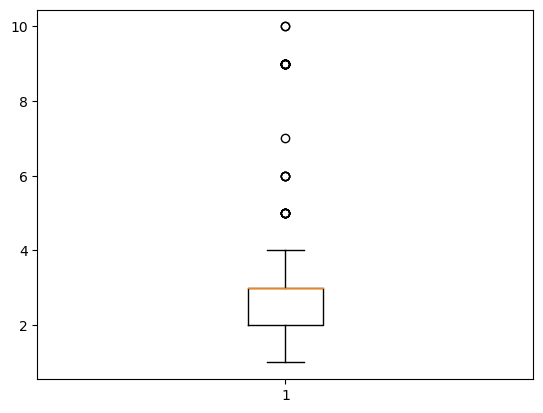

In [44]:
plt.boxplot(df1["No_Bhk"])
plt.show()

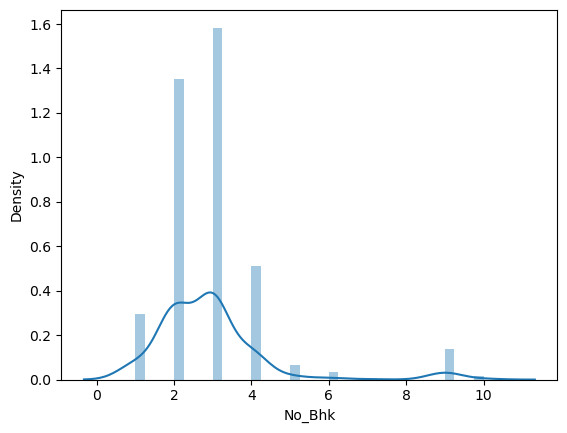

In [45]:
sns.distplot(df1["No_Bhk"])
plt.show()

In [46]:
df1["No_Bhk"].skew()

2.462455224299497

In [47]:
np.round(df1["No_Bhk"].skew())

2.0

### Not Normally Distributed

## IQR

    Rule-->
        iqr = q3-q1
        Lower Limit = q1-(1.5*iqr)
        Upper Limit = q3+(1.5*iqr) 

In [48]:
q1=df1["No_Bhk"].quantile(0.25)

In [49]:
q1

2.0

In [50]:
q3=df1["No_Bhk"].quantile(0.75)

In [51]:
q3

3.0

In [52]:
iqr=q3-q1

In [53]:
iqr

1.0

In [54]:
Lower=q1-(1.5*iqr)

In [55]:
Lower 

0.5

In [56]:
Upper=q3+(1.5*iqr)

In [57]:
Upper

4.5

In [58]:
df1["No_Bhk"]< Lower

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: No_Bhk, Length: 500, dtype: bool

In [59]:
df1[df1["No_Bhk"]< Lower]

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status


In [60]:
df1["No_Bhk"]>Upper

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: No_Bhk, Length: 500, dtype: bool

In [61]:
df1[df1["No_Bhk"]>Upper]

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status
21,AGENT,6,Cuttack,Professors Colony,250.0,6250,4000.0,Ready to move
83,BUILDER,5,Mumbai,Boisar,199.0,6813,2921.0,Under Construction
253,AGENT,5,Chandigarh,Mullanpur Garibdass,315.0,5893,5345.0,Ready to move
270,VERIFIED OWNER,5,Noida,Sector 93B,795.0,14454,5500.0,Ready to move
284,VERIFIED OWNER,6,Allahabad,Tagore town,320.0,7619,4200.0,Ready to move
308,VERIFIED OWNER,6,Surat,Nanpura,270.0,3698,7300.0,Ready to move
321,BUILDER,5,Gurgaon,Sector 22 Gurgaon,1515.0,15000,10105.0,Under Construction
339,VERIFIED OWNER,10,Gurgaon,Sector 11,280.0,3703,7560.0,Ready to move
367,VERIFIED OWNER,7,Dehradun,Dalanwala,314.0,7385,4265.0,Ready to move
368,VERIFIED OWNER,6,Dehradun,Ganesh Pur,300.0,9230,3250.0,Ready to move


In [62]:
df1[df1["No_Bhk"]>Upper].shape[0]

32

In [63]:
df1[(df1["No_Bhk"]< Lower) | (df1["No_Bhk"]>Upper)]

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status
21,AGENT,6,Cuttack,Professors Colony,250.0,6250,4000.0,Ready to move
83,BUILDER,5,Mumbai,Boisar,199.0,6813,2921.0,Under Construction
253,AGENT,5,Chandigarh,Mullanpur Garibdass,315.0,5893,5345.0,Ready to move
270,VERIFIED OWNER,5,Noida,Sector 93B,795.0,14454,5500.0,Ready to move
284,VERIFIED OWNER,6,Allahabad,Tagore town,320.0,7619,4200.0,Ready to move
308,VERIFIED OWNER,6,Surat,Nanpura,270.0,3698,7300.0,Ready to move
321,BUILDER,5,Gurgaon,Sector 22 Gurgaon,1515.0,15000,10105.0,Under Construction
339,VERIFIED OWNER,10,Gurgaon,Sector 11,280.0,3703,7560.0,Ready to move
367,VERIFIED OWNER,7,Dehradun,Dalanwala,314.0,7385,4265.0,Ready to move
368,VERIFIED OWNER,6,Dehradun,Ganesh Pur,300.0,9230,3250.0,Ready to move


### <font color="Green">Capping

In [64]:
df1[(df1["No_Bhk"]< Lower) | (df1["No_Bhk"]>Upper)]

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status
21,AGENT,6,Cuttack,Professors Colony,250.0,6250,4000.0,Ready to move
83,BUILDER,5,Mumbai,Boisar,199.0,6813,2921.0,Under Construction
253,AGENT,5,Chandigarh,Mullanpur Garibdass,315.0,5893,5345.0,Ready to move
270,VERIFIED OWNER,5,Noida,Sector 93B,795.0,14454,5500.0,Ready to move
284,VERIFIED OWNER,6,Allahabad,Tagore town,320.0,7619,4200.0,Ready to move
308,VERIFIED OWNER,6,Surat,Nanpura,270.0,3698,7300.0,Ready to move
321,BUILDER,5,Gurgaon,Sector 22 Gurgaon,1515.0,15000,10105.0,Under Construction
339,VERIFIED OWNER,10,Gurgaon,Sector 11,280.0,3703,7560.0,Ready to move
367,VERIFIED OWNER,7,Dehradun,Dalanwala,314.0,7385,4265.0,Ready to move
368,VERIFIED OWNER,6,Dehradun,Ganesh Pur,300.0,9230,3250.0,Ready to move


In [65]:
df1["No_Bhk"].map(lambda x: Lower if x<Lower else Upper if x>Upper else x)

0      4.0
1      3.0
2      2.0
3      3.0
4      3.0
      ... 
495    3.0
496    3.0
497    3.0
498    3.0
499    3.0
Name: No_Bhk, Length: 500, dtype: float64

In [66]:
df1["No_Bhk"]=df1["No_Bhk"].map(lambda x: Lower if x<Lower else Upper if x>Upper else x)

In [67]:
df1[(df1["No_Bhk"]< Lower) | (df1["No_Bhk"]>Upper)]

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status


In [68]:
df1["No_Bhk"]=df1["No_Bhk"].astype("int")

In [69]:
df1["No_Bhk"].unique()

array([4, 3, 2, 1])

###  <font color="brown"/>Price(in Lakh)</font>

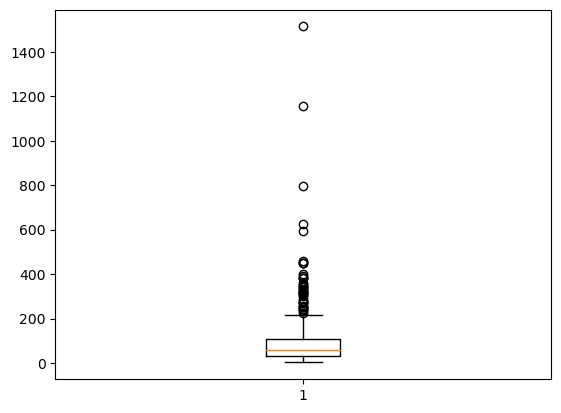

In [70]:
plt.boxplot(df1["Price(in Lakh)"])
plt.show()

<AxesSubplot:xlabel='Price(in Lakh)', ylabel='Density'>

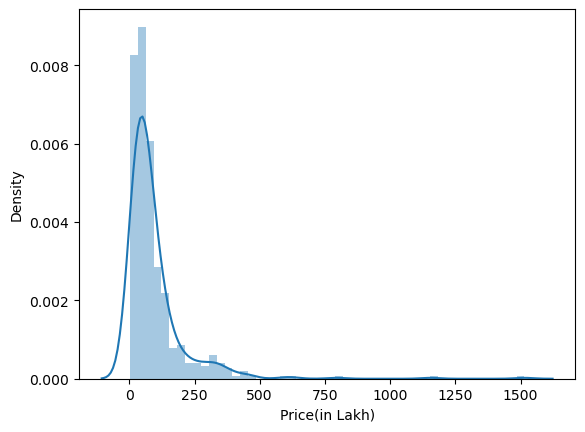

In [71]:
sns.distplot(df1["Price(in Lakh)"])

In [72]:
df1["Price(in Lakh)"].skew()

5.418569908154095

In [73]:
np.round(df1["Price(in Lakh)"].skew())

5.0

### Not Normally Distributed

### IQR

    Rule-->
        iqr = q3-q1
        Lower Limit = q1-(1.5*iqr)
        Upper Limit = q3+(1.5*iqr) 
        

In [74]:
q1=df1["Price(in Lakh)"].quantile(0.25)

In [75]:
q1 # First Quartile 

32.75

In [76]:
q3=df1["Price(in Lakh)"].quantile(0.75)

In [77]:
q3 # Third Quartile

107.0

In [78]:
iqr=q3-q1 # IQR 

In [79]:
iqr

74.25

In [80]:
l=q1-(1.5*iqr) # Lower Limit

In [81]:
l

-78.625

In [82]:
u=q3+(1.5*iqr) # Upper Limit

In [83]:
u

218.375

In [84]:
df1["Price(in Lakh)"]<l

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: Price(in Lakh), Length: 500, dtype: bool

In [85]:
df1[df1["Price(in Lakh)"]< l]

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status


In [86]:
df1["Price(in Lakh)"]>u

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: Price(in Lakh), Length: 500, dtype: bool

In [87]:
df1[df1["Price(in Lakh)"]>u]

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status
21,AGENT,4,Cuttack,Professors Colony,250.0,6250,4000.0,Ready to move
55,BUILDER,4,Bangalore,Marathahalli,460.0,11219,4100.0,Under Construction
56,BUILDER,4,Bangalore,Hebbal,341.0,11118,3067.0,Ready to move
64,VERIFIED OWNER,3,Delhi,Lajpat Nagar,305.0,16944,1800.0,Ready to move
69,VERIFIED OWNER,4,Delhi,Sector 14 Rohini,360.0,12000,3000.0,Ready to move
72,VERIFIED OWNER,4,Delhi,Vasant Kunj,330.0,27500,1200.0,Ready to move
79,VERIFIED OWNER,3,Delhi,Bali Nagar,275.0,12500,2200.0,Ready to move
81,BUILDER,3,Mumbai,Santacruz East,289.0,37146,778.0,Under Construction
87,BUILDER,3,Mumbai,Andheri West,344.0,30000,1147.0,Under Construction
89,BUILDER,2,Mumbai,Andheri West,226.0,32992,685.0,Under Construction


### <font color="blue"/>Capping</font>

In [88]:
df1[(df1["Price(in Lakh)"]<l) | (df1["Price(in Lakh)"]>u)]

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status
21,AGENT,4,Cuttack,Professors Colony,250.0,6250,4000.0,Ready to move
55,BUILDER,4,Bangalore,Marathahalli,460.0,11219,4100.0,Under Construction
56,BUILDER,4,Bangalore,Hebbal,341.0,11118,3067.0,Ready to move
64,VERIFIED OWNER,3,Delhi,Lajpat Nagar,305.0,16944,1800.0,Ready to move
69,VERIFIED OWNER,4,Delhi,Sector 14 Rohini,360.0,12000,3000.0,Ready to move
72,VERIFIED OWNER,4,Delhi,Vasant Kunj,330.0,27500,1200.0,Ready to move
79,VERIFIED OWNER,3,Delhi,Bali Nagar,275.0,12500,2200.0,Ready to move
81,BUILDER,3,Mumbai,Santacruz East,289.0,37146,778.0,Under Construction
87,BUILDER,3,Mumbai,Andheri West,344.0,30000,1147.0,Under Construction
89,BUILDER,2,Mumbai,Andheri West,226.0,32992,685.0,Under Construction


In [89]:
df1["Price(in Lakh)"].map(lambda x: l if x<l else u if x>u else x)

0      66.0
1      94.0
2      47.0
3      85.0
4      80.0
       ... 
495    82.0
496     4.0
497     6.0
498     8.0
499     8.0
Name: Price(in Lakh), Length: 500, dtype: float64

In [90]:
df1["Price(in Lakh)"]=df1["Price(in Lakh)"].map(lambda x: l if x<l else u if x>u else x)

In [91]:
df1[(df1["Price(in Lakh)"]<l) | (df1["Price(in Lakh)"]>u)]

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status


### <font color="brown">price/squarefeet</font>

In [92]:
df1["price/squarefeet"]

0      2933
1      5400
2      4700
3      5000
4      4369
       ... 
495    9213
496    1037
497     722
498     833
499     833
Name: price/squarefeet, Length: 500, dtype: int32

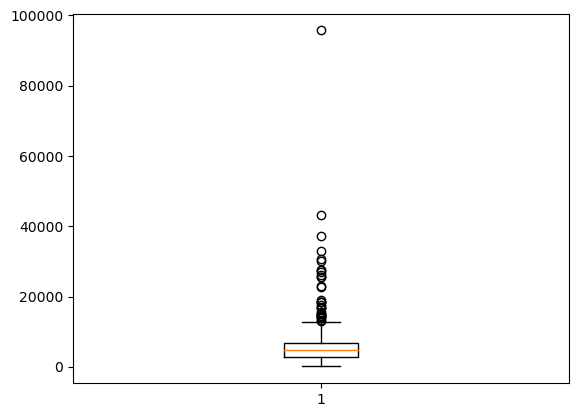

In [93]:
plt.boxplot(df1["price/squarefeet"])
plt.show()

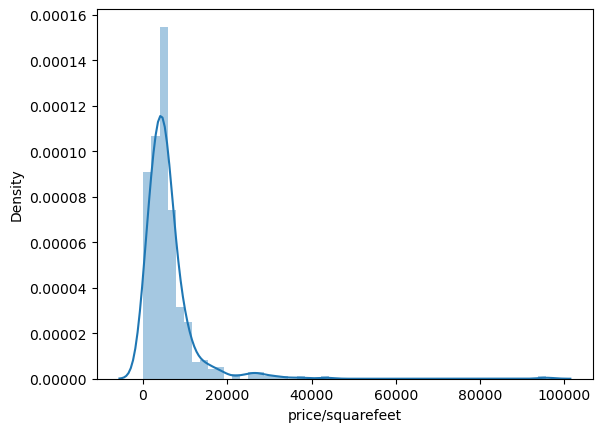

In [94]:
sns.distplot(df1["price/squarefeet"])
plt.show()

In [95]:
df1["price/squarefeet"].skew()

6.617060021897656

In [96]:
np.round(df1["price/squarefeet"].skew())

7.0

### Not Normally Distributed

### IQR
    Rule-->
        IQR= q3-q1
        Lower Limit= q1-(1.5*iqr)
        Higher Limit= q3+(1.5*iqr)

In [97]:
q1= df1["price/squarefeet"].quantile(0.25)

In [98]:
q1

2836.5

In [99]:
q3=df1["price/squarefeet"].quantile(0.75)

In [100]:
q3

6841.25

In [101]:
iqr=q3-q1

In [102]:
iqr

4004.75

In [103]:
l=q1-(1.5*iqr)

In [104]:
l

-3170.625

In [105]:
u=q3+(1.5*iqr)

In [106]:
u

12848.375

In [107]:
df1["price/squarefeet"]<l

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: price/squarefeet, Length: 500, dtype: bool

In [108]:
df1[df1["price/squarefeet"]<l]

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status


In [109]:
df1[df1["price/squarefeet"]<l].shape[0]

0

In [110]:
df1["price/squarefeet"]>u

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: price/squarefeet, Length: 500, dtype: bool

In [111]:
df1[df1["price/squarefeet"]>u]

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status
23,AGENT,2,Cuttack,Professors Colony,143.000,95726,150.0,Resale
27,AGENT,3,Cuttack,Nuapada,65.000,43333,150.0,Resale
64,VERIFIED OWNER,3,Delhi,Lajpat Nagar,218.375,16944,1800.0,Ready to move
72,VERIFIED OWNER,4,Delhi,Vasant Kunj,218.375,27500,1200.0,Ready to move
81,BUILDER,3,Mumbai,Santacruz East,218.375,37146,778.0,Under Construction
82,BUILDER,2,Mumbai,Mira Road East,94.000,14280,659.0,Under Construction
86,BUILDER,2,Mumbai,Malad East,161.000,26003,623.0,Ready to move
87,BUILDER,3,Mumbai,Andheri West,218.375,30000,1147.0,Under Construction
88,BUILDER,2,Mumbai,Thane West,142.000,25585,555.0,Under Construction
89,BUILDER,2,Mumbai,Andheri West,218.375,32992,685.0,Under Construction


In [112]:
df1[df1["price/squarefeet"]>u].shape[0]

33

In [113]:
df1[(df1["price/squarefeet"]<l)    |   (df1["price/squarefeet"]>u)]

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status
23,AGENT,2,Cuttack,Professors Colony,143.000,95726,150.0,Resale
27,AGENT,3,Cuttack,Nuapada,65.000,43333,150.0,Resale
64,VERIFIED OWNER,3,Delhi,Lajpat Nagar,218.375,16944,1800.0,Ready to move
72,VERIFIED OWNER,4,Delhi,Vasant Kunj,218.375,27500,1200.0,Ready to move
81,BUILDER,3,Mumbai,Santacruz East,218.375,37146,778.0,Under Construction
82,BUILDER,2,Mumbai,Mira Road East,94.000,14280,659.0,Under Construction
86,BUILDER,2,Mumbai,Malad East,161.000,26003,623.0,Ready to move
87,BUILDER,3,Mumbai,Andheri West,218.375,30000,1147.0,Under Construction
88,BUILDER,2,Mumbai,Thane West,142.000,25585,555.0,Under Construction
89,BUILDER,2,Mumbai,Andheri West,218.375,32992,685.0,Under Construction


### <font color="blue">Capping</font>

In [114]:
df1["price/squarefeet"].map(lambda x: l if x<l else u if x>u  else x)

0      2933.0
1      5400.0
2      4700.0
3      5000.0
4      4369.0
        ...  
495    9213.0
496    1037.0
497     722.0
498     833.0
499     833.0
Name: price/squarefeet, Length: 500, dtype: float64

In [115]:
df1["price/squarefeet"]=df1["price/squarefeet"].map(lambda x: l if x<l else u if x>u  else x)

In [116]:
df1[(df1["price/squarefeet"]<l)    |   (df1["price/squarefeet"]>u)]

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status


### <font color="brown">Total Squarefeet</font>

In [117]:
df1["Total Squarefeet"]

0      2250.0
1      1740.0
2      1000.0
3      1700.0
4      1831.0
        ...  
495     890.0
496     425.0
497     900.0
498     900.0
499     900.0
Name: Total Squarefeet, Length: 500, dtype: float64

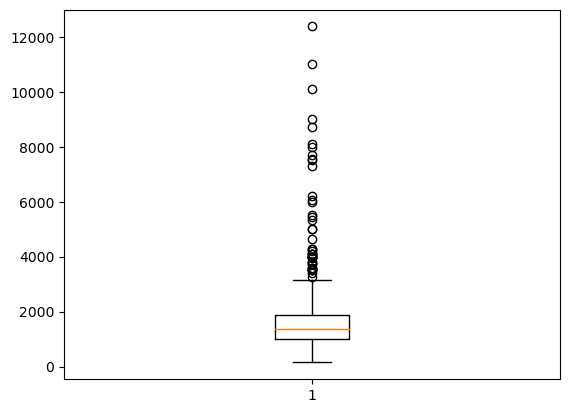

In [118]:
plt.boxplot(df1["Total Squarefeet"])
plt.show()

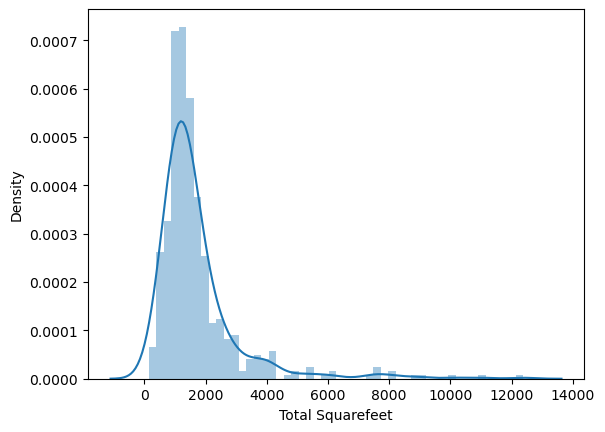

In [119]:
sns.distplot(df1["Total Squarefeet"])
plt.show()

In [120]:
df1["Total Squarefeet"].skew()

3.483104904715013

In [121]:
np.round(df1["Total Squarefeet"].skew())

3.0

### Not Normally Distributed

### IQR
    Rule-->
        IQR= q3-q1
        Lower Limit= q1-(1.5*iqr)
        Higher Limit= q3+(1.5*iqr)

In [122]:
q1=df1["Total Squarefeet"].quantile(0.25)

In [123]:
q1

1000.0

In [124]:
q3=df1["Total Squarefeet"].quantile(0.75)

In [125]:
q3

1876.75

In [126]:
iqr=q3-q1

In [127]:
iqr

876.75

In [128]:
l=q1-(1.5*iqr)

In [129]:
l

-315.125

In [130]:
u=q3+(1.5*iqr)

In [131]:
u

3191.875

In [132]:
df1["Total Squarefeet"]<l

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: Total Squarefeet, Length: 500, dtype: bool

In [133]:
df1[df1["Total Squarefeet"]<l]

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status


In [134]:
df1["Total Squarefeet"]>u

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: Total Squarefeet, Length: 500, dtype: bool

In [135]:
df1[df1["Total Squarefeet"]>u]

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status
19,AGENT,1,Bhubaneswar,Khordha,213.000,2450.000,8712.0,Resale
21,AGENT,4,Cuttack,Professors Colony,218.375,6250.000,4000.0,Ready to move
24,AGENT,2,Cuttack,CDA Area,105.000,2649.000,3963.0,Resale
26,AGENT,3,Cuttack,Trisulia,98.000,1618.000,6056.0,New
55,BUILDER,4,Bangalore,Marathahalli,218.375,11219.000,4100.0,Under Construction
135,VERIFIED OWNER,2,Bhopal,Barkheda,33.000,300.000,11000.0,Resale
136,VERIFIED OWNER,2,Bhopal,Phanda Kala,15.000,250.000,6000.0,Resale
138,VERIFIED OWNER,2,Bhopal,Phanda Kala,18.000,225.000,8000.0,Resale
139,VERIFIED OWNER,2,Bhopal,Phanda Kala,18.000,350.000,5000.0,Resale
142,BUILDER,2,Indore,Rau,139.000,3257.000,4268.0,New


In [136]:
df1[df1["Total Squarefeet"]>u].shape[0]

44

In [137]:
df1[(df1["Total Squarefeet"]<l) | (df1["Total Squarefeet"]>u) ]

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status
19,AGENT,1,Bhubaneswar,Khordha,213.000,2450.000,8712.0,Resale
21,AGENT,4,Cuttack,Professors Colony,218.375,6250.000,4000.0,Ready to move
24,AGENT,2,Cuttack,CDA Area,105.000,2649.000,3963.0,Resale
26,AGENT,3,Cuttack,Trisulia,98.000,1618.000,6056.0,New
55,BUILDER,4,Bangalore,Marathahalli,218.375,11219.000,4100.0,Under Construction
135,VERIFIED OWNER,2,Bhopal,Barkheda,33.000,300.000,11000.0,Resale
136,VERIFIED OWNER,2,Bhopal,Phanda Kala,15.000,250.000,6000.0,Resale
138,VERIFIED OWNER,2,Bhopal,Phanda Kala,18.000,225.000,8000.0,Resale
139,VERIFIED OWNER,2,Bhopal,Phanda Kala,18.000,350.000,5000.0,Resale
142,BUILDER,2,Indore,Rau,139.000,3257.000,4268.0,New


### <font color="blue">Capping</font>

In [138]:
df1["Total Squarefeet"].map(lambda x: l if x<l else u if x>u else x)

0      2250.0
1      1740.0
2      1000.0
3      1700.0
4      1831.0
        ...  
495     890.0
496     425.0
497     900.0
498     900.0
499     900.0
Name: Total Squarefeet, Length: 500, dtype: float64

In [139]:
df1["Total Squarefeet"]=df1["Total Squarefeet"].map(lambda x: l if x<l else u if x>u else x)

In [140]:
df1[(df1["Total Squarefeet"]<l) | (df1["Total Squarefeet"]>u) ]

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status


In [141]:
df1 #  This the Fianl Dataset

,Owner,No_Bhk,City,locality,Price(in Lakh),price/squarefeet,Total Squarefeet,Construction Status
0,VERIFIED OWNER,4,Bhubaneswar,Balianta,66.0,2933.0,2250.0,Ready to move
1,VERIFIED OWNER,3,Bhubaneswar,Rasulgarh,94.0,5400.0,1740.0,Under Construction
2,VERIFIED OWNER,2,Bhubaneswar,Bhagawanpur,47.0,4700.0,1000.0,Under Construction
3,VERIFIED OWNER,3,Bhubaneswar,Sundarpada,85.0,5000.0,1700.0,Ready to move
4,VERIFIED OWNER,3,Bhubaneswar,Sundarpada,80.0,4369.0,1831.0,Ready to move
...,...,...,...,...,...,...,...,...
495,VERIFIED OWNER,3,Agra,Shastripuram,82.0,9213.0,890.0,Ready to move
496,VERIFIED OWNER,3,Agra,Shastripuram,4.0,1037.0,425.0,Resale
497,BUILDER,3,Agra,Rohta,6.0,722.0,900.0,New
498,BUILDER,3,Agra,Agra Cantt,8.0,833.0,900.0,New


In [142]:
df1["Owner"].value_counts()

VERIFIED OWNER    242
BUILDER           196
AGENT              61
OWNER               1
Name: Owner, dtype: int64

In [143]:
df1["No_Bhk"].value_counts()

3    198
2    169
4     96
1     37
Name: No_Bhk, dtype: int64

In [144]:
df1["City"].value_counts()

Bhubaneswar      20
Noida            20
Lucknow          20
Patna            20
Mysore           20
Nashik           20
Faridabad        20
Dehradun         20
Varanasi         20
Gurgaon          20
Surat            20
Allahabad        20
Chandigarh       20
Cuttack          20
Coimbatore       20
Chennai          20
Visakhapatnam    20
Pune             20
Indore           20
Bhopal           20
Nagpur           20
Mumbai           20
Delhi            20
Bangalore        20
Agra             20
Name: City, dtype: int64

In [145]:
df1["locality"].value_counts()

Yadagirigutta           9
Bihta                   8
Jhalwa                  6
Rau                     6
Sundarpada              5
                       ..
Manapakkam              1
Kandigai                1
Panayur                 1
Kattankulathur          1
Agra Cantonment Road    1
Name: locality, Length: 314, dtype: int64

In [146]:
df1["Construction Status"].value_counts()

Ready to move         203
Under Construction    166
Resale                 91
New                    40
Name: Construction Status, dtype: int64

In [147]:
df1.dtypes

Owner                   object
No_Bhk                   int32
City                    object
locality                object
Price(in Lakh)         float64
price/squarefeet       float64
Total Squarefeet       float64
Construction Status     object
dtype: object

## <font color="red"/>Data Visualization</font>

### <font color="Green"/>Uni-Variate Analysis</font>

    In Uni-Variate Analysis we can analysis the data by using one feature.

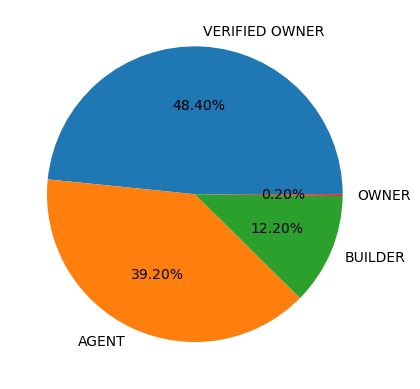

In [148]:
plt.pie(df1["Owner"].value_counts(),labels=df1["Owner"].unique(),autopct="%0.2F%%")
plt.show()

    Here I have taken Owner feature and observed that Verified Owner have more numbers of Apartment in every city.

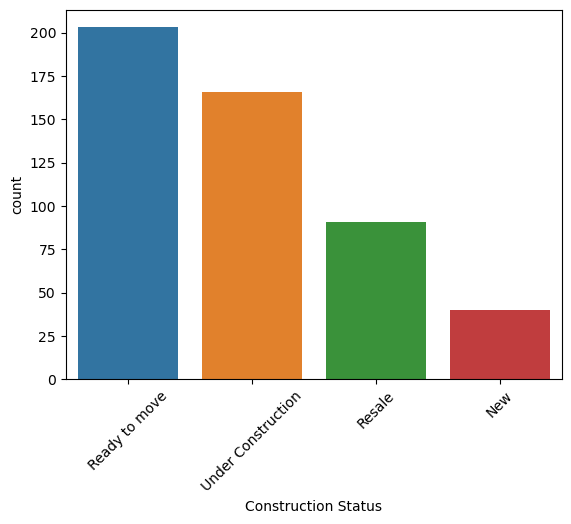

In [149]:
sns.countplot(x="Construction Status",data=df1)
plt.xticks(rotation=45)
plt.show()

   Here I have taken Construction Status Feature Ready to move(Those apartments are constructed and ready to sale) apartments are more in every city.

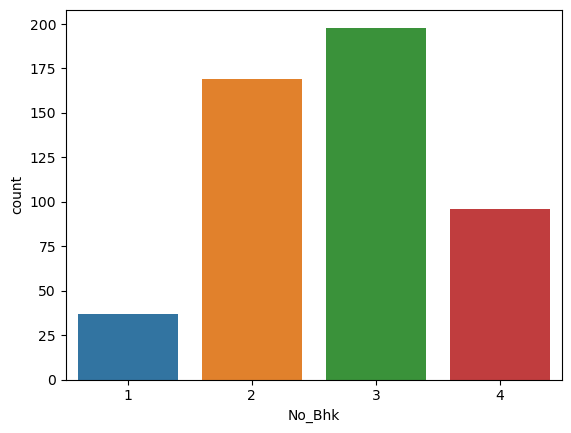

In [150]:
sns.countplot(x="No_Bhk",data=df1)
plt.show()

    3-Bhk apartments are more in every city.

### <font color="Green"/>Bi-Variate Analysis</font>

    In Bi-Variate Analysis we can analysis the data by using two features.

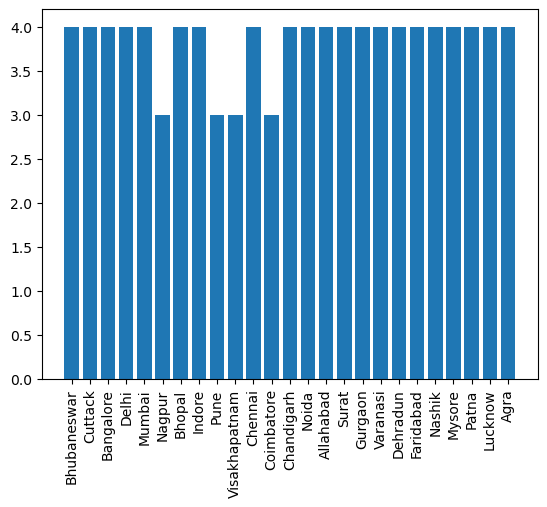

In [151]:
plt.bar(df1["City"],df1["No_Bhk"])
plt.xticks(rotation=90)
plt.show()

In [152]:
df1["Price(in Lakh)"].mean()

78.77175

In [153]:
df1["Price(in Lakh)"].min()

2.0

In [154]:
df1["Price(in Lakh)"].max()

218.375

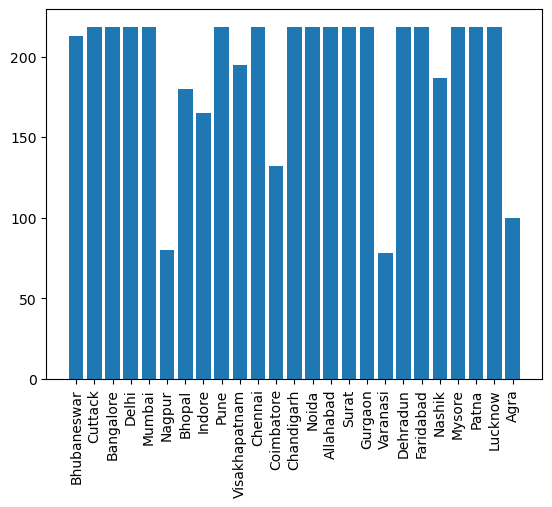

In [155]:
plt.bar(df1["City"],df1["Price(in Lakh)"])
plt.xticks(rotation=90)
plt.show()

    Here I have taken City and Price(in Lakh) Featues and observed that in Agra,Varanasi & Nagpur the apartment are in average price.

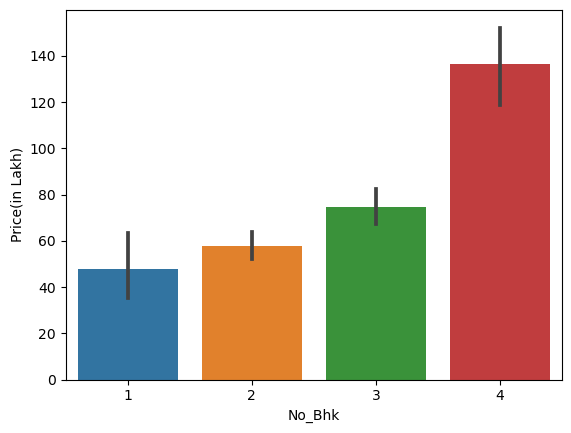

In [156]:
sns.barplot(x="No_Bhk",y="Price(in Lakh)",data=df1)
# plt.xticks(rotation=90)
plt.show()

   Here I have taken No_Bhk and Price(in Lakh) and observed that 3-Bhk Apartments will get in average price & 4-Bhk Apartments will get in more price.

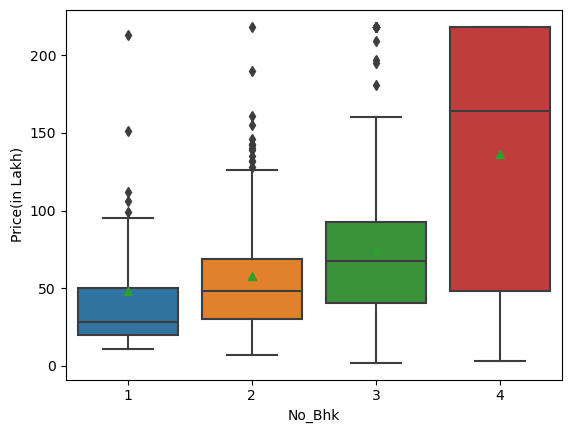

In [157]:
sns.boxplot(x = "No_Bhk", y = "Price(in Lakh)", data = df1,showmeans=True)
plt.show()

    Here I have taken No_Bhk and Price(in Lakh) features and observed that 1,2,3-Bhk have outliers but 4-Bhk donot have any ouliers

### <font color="Green"/>Multi-Variate Analysis</font>

    In Multi-Variate Analysis we can analysis the data by using more than two features.

In [158]:
nop=df1.pivot_table(index="No_Bhk",columns="Construction Status",aggfunc="mean")

In [159]:
nop

Price(in Lakh)                           \
Construction Status            New Ready to move     Resale   
No_Bhk                                                        
1                        32.000000     53.117647  45.428571   
2                        61.857143     60.131148  37.703704   
3                        35.142857     83.147059  26.371429   
4                        38.000000    177.003125  56.005682   

                                       Total Squarefeet                \
Construction Status Under Construction              New Ready to move   
No_Bhk                                                                  
1                            43.333333      2450.000000    723.470588   
2                            62.542910      1825.419643   1082.573770   
3                            98.279297      1530.491071   1610.563235   
4                           189.907609      1499.806818   2649.859375   

                                                    price/squarefeet  \
Construction Status       Resale Under Construction              New   
No_Bhk                                                                 
1                    2271.803571         463.083333      1289.000000   
2                    1707.148148        1004.000000      3377.071429   
3                    1209.567857        1520.500000      1912.000000   
4                    1676.977273        2771.853261      2672.090909   

                                                                   
Construction Status Ready to move       Resale Under Construction  
No_Bhk                                                             
1                     6544.691176  1105.571429        7888.145833  
2                     5369.536885  2673.175926        6003.570896  
3                     5278.166176  2280.753571        6287.445312  
4                     7239.928125  3160.988636        8712.271739

In [160]:
nop1=df1.pivot_table(index="No_Bhk",columns="Construction Status",values="Price(in Lakh)",aggfunc="mean")

In [161]:
nop1

Construction Status,New,Ready to move,Resale,Under Construction
No_Bhk,,,,
1,32.000000,53.117647,45.428571,43.333333
2,61.857143,60.131148,37.703704,62.542910
3,35.142857,83.147059,26.371429,98.279297
4,38.000000,177.003125,56.005682,189.907609


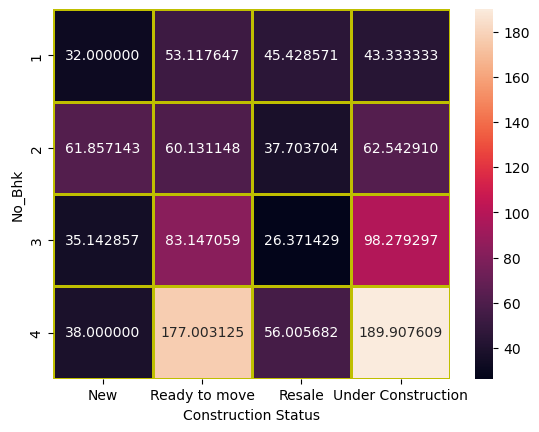

In [162]:
sns.heatmap(nop1,linewidths=1, linecolor="y",annot=True,fmt="f")
plt.show()

    Under Construction 4-Bhk is more in Price and New 1-Bhk is less in Price.

<AxesSubplot:>

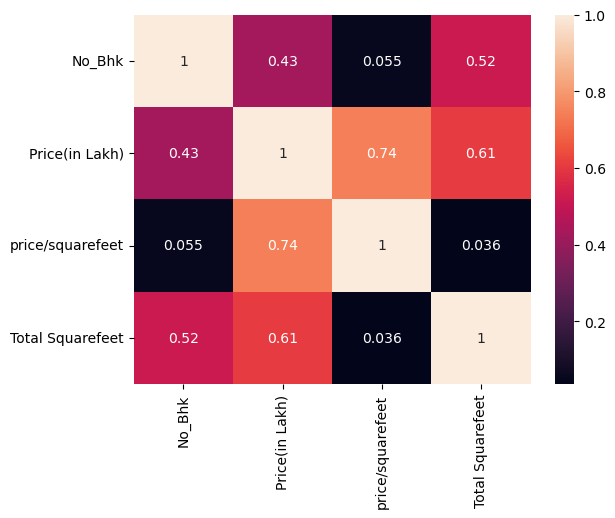

In [163]:
sns.heatmap(df1.corr(),annot=True)

    No_Bhk is corelated with Total Squarefeet that menas if No_Bhk is increases then Total Squarefeet also increases.
    Total Sqaurefeet also corelated with Price(in Lakhe).


In [164]:
sn

,No_Bhk,Price(in Lakh),price/squarefeet,Total Squarefeet
0,4,66.0,2933,2250.0
1,3,94.0,5400,1740.0
2,2,47.0,4700,1000.0
3,3,85.0,5000,1700.0
4,3,80.0,4369,1831.0
...,...,...,...,...
495,3,82.0,9213,890.0
496,3,4.0,1037,425.0
497,3,6.0,722,900.0
498,3,8.0,833,900.0


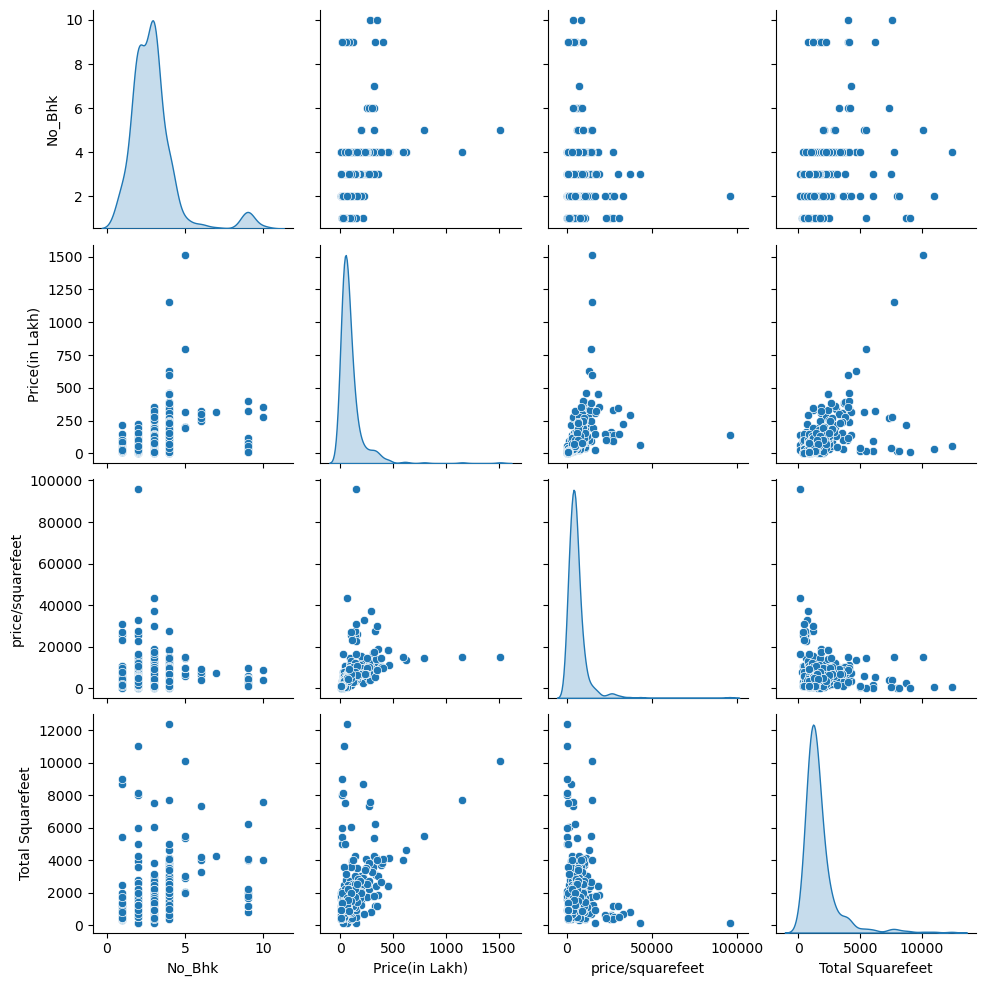

In [165]:
g=sns.pairplot(sn, diag_kind="kde")

    Pair Plot use for Numerical Analysis.

### <font color="Green">Insights

    -WE CAN BUY AN APARTMENTS IN AGRA, VARANASI, & NAGPUR IN AVERAGE PRICE.
    -VERIFIED OWNER HAVE MORE APARTMENTS IN EVERY CITIES.
    -READY TO MOVE APARTMENTS ARE MORE IN EVERY CITIES.
    -3-BHK APARTMENTS ARE MORE IN EVERY CITIES.
    -4-BHK APARTMENTS ARE MORE IN PRICE IN EVERY CITIES.
